In [54]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
import statsmodels.api as sm


In [55]:
df_vendas = pd.read_csv('./datasets/Preços_de_casas.csv')

df_vendas.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [56]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [57]:
df_vendas.drop(columns=['Id'], axis=1, inplace=True)

In [58]:
corr = df_vendas.corr()

In [59]:
corr['preco_de_venda']

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

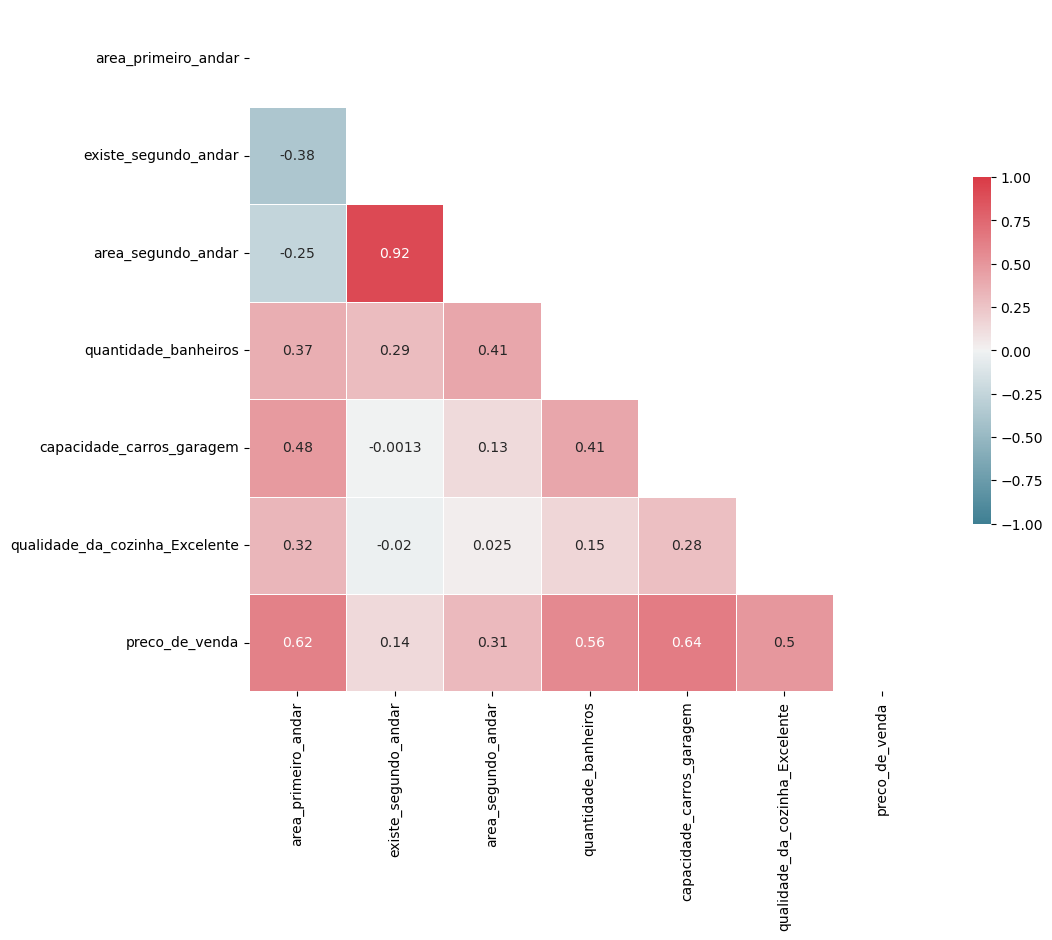

In [60]:
# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

c:\Users\Thiago\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



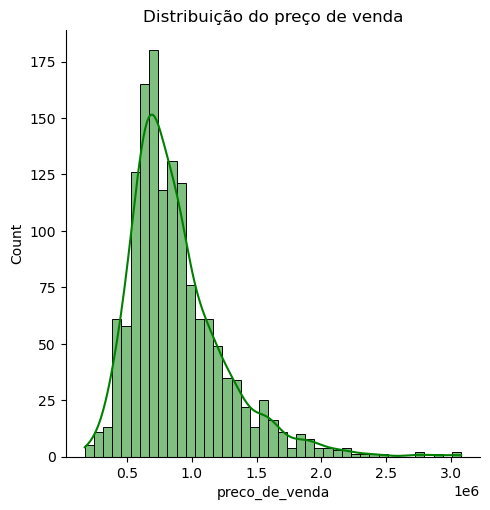

In [61]:
sns.displot(df_vendas['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

Text(0, 0.5, 'Preço de venda')

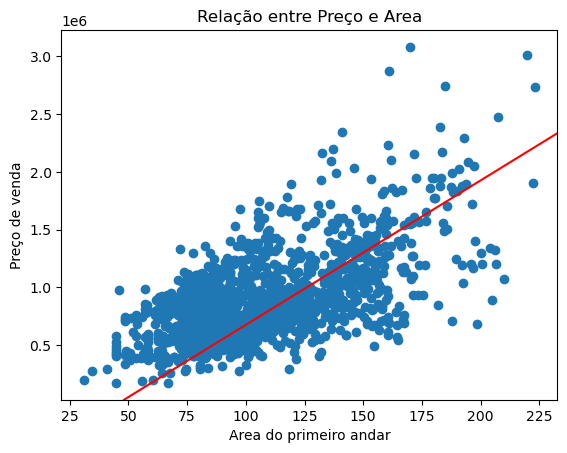

In [62]:
# Aparentemente, quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?
plt.scatter(df_vendas['area_primeiro_andar'], df_vendas['preco_de_venda'])
plt.axline(xy1 = (66, 250000),xy2 = (190, 1800000), color = "red" )
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")


In [63]:
# Qual a reta que melhor se adequa a relação?
px.scatter(df_vendas, x = 'area_primeiro_andar', y = 'preco_de_venda', trendline_color_override="red", trendline = 'ols' )


In [64]:
y = df_vendas['preco_de_venda']
X = df_vendas.drop(columns = 'preco_de_venda')


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state= 230)


In [66]:
df_train = pd.DataFrame(data= X_train) 
df_train['preco_de_venda'] = Y_train

In [67]:
# ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data = df_train).fit()

In [68]:
modelo_0.params

Intercept              152909.288334
area_primeiro_andar      6793.641641
dtype: float64

In [69]:
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.22e-105
Time:                        16:29:41   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

In [70]:
modelo_0.rsquared

0.3772801099429789

In [71]:
modelo_0.resid

1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

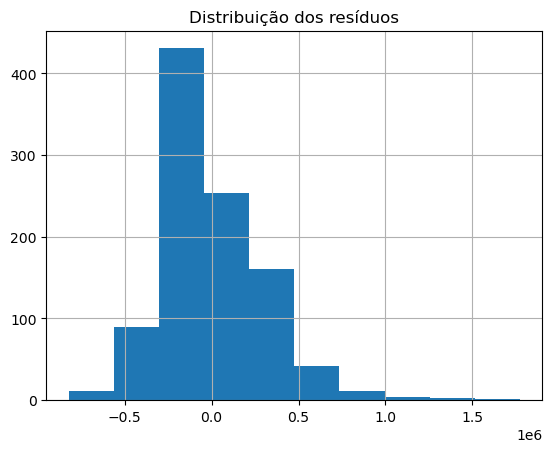

In [72]:
modelo_0.resid.hist()
plt.title("Distribuição dos resíduos")
plt.show()

In [73]:
y_predict = modelo_0.predict(X_test)

In [74]:
#printando o R² 
print("R²: ", r2_score(Y_test,y_predict))


R²:  0.3853092872320242


c:\Users\Thiago\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



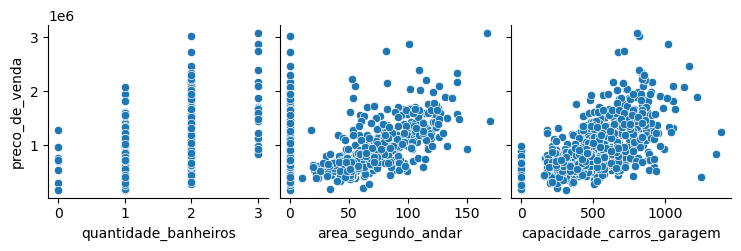

In [75]:
sns.pairplot(df_vendas, y_vars = 'preco_de_venda', x_vars = ['quantidade_banheiros','area_segundo_andar','capacidade_carros_garagem'])

In [76]:
# adicionando o constante
X_train = sm.add_constant(X_train)


In [77]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'area_segundo_andar','quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()


In [78]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()


In [79]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros',
                           'qualidade_da_cozinha_Excelente']]).fit()


In [80]:
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.79e-289
Time:                        16:29:42   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [81]:
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.93e-264
Time:                        16:29:42   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [82]:
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.15e-227
Time:                        16:29:42   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [83]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)


R²
Modelo 0:  0.3772801099429789
Modelo 1:  0.7414024156090393
Modelo 2:  0.7081440416220739
Modelo 3:  0.6511289354898802


In [84]:
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
7
6
5


In [85]:
modelo_3.params

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64

In [86]:
X_test = sm.add_constant(X_test)

In [87]:
predict_3 = modelo_3.predict(X_test[['const', 'area_primeiro_andar',
                   'existe_segundo_andar', 'quantidade_banheiros',
                   'qualidade_da_cozinha_Excelente' ]])

In [88]:
modelo_3.rsquared

0.6511289354898802

In [89]:
# Qual o R² do treino?
print("R²: ", r2_score(Y_test, predict_3))


R²:  0.6432078074497708


In [90]:
novo_imovel = pd.DataFrame({'const':[1],
                            'area_primeiro_andar':[120],
                            'existe_segundo_andar': [1],
                            'quantidade_banheiros': [2],
                            'qualidade_da_cozinha_Excelente': [0]
                            })


In [91]:
modelo_0.predict(novo_imovel['area_primeiro_andar'])

0    968146.285305
dtype: float64

In [92]:
modelo_3.predict(novo_imovel)[0]

1123758.242602053

In [93]:
novas_casas = pd.read_csv("./datasets/Novas_casas.csv", sep = ";")

In [94]:
novas_casas.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [95]:
novas_casas.drop(columns=['Casa'], axis=1, inplace=True)

In [96]:
novas_casas = sm.add_constant(novas_casas)

In [97]:
modelo_3.predict(novas_casas)

0    1.751739e+06
1    1.863058e+06
2    1.568149e+06
3    2.206758e+06
4    1.591629e+06
5    1.246151e+06
6    1.357470e+06
7    1.552134e+06
8    9.636478e+05
9    1.639974e+06
dtype: float64

In [98]:
novo_imovel = pd.DataFrame({'const':[1],
                            'area_primeiro_andar':[98],
                            'existe_segundo_andar': [0],
                            'quantidade_banheiros': [1],
                            'qualidade_da_cozinha_Excelente': [1]
                            })

In [99]:
modelo_3.predict(novo_imovel)

0    1.063174e+06
dtype: float64

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [101]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']
             
explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']


In [102]:
vif_1 = pd.DataFrame()
vif_1["variavel"] = explicativas_1

vif_1["vif"] = [variance_inflation_factor(X_train[explicativas_1], i) for i in range(len(explicativas_1))]


In [104]:
vif_1

,variavel,vif
0,const,20.230833
1,area_primeiro_andar,2.193680
2,existe_segundo_andar,7.455059
3,area_segundo_andar,7.589396
4,quantidade_banheiros,1.720795
5,capacidade_carros_garagem,1.570078
6,qualidade_da_cozinha_Excelente,1.182606


In [103]:
vif_3 = pd.DataFrame()
vif_3["variavel"] = explicativas_3

vif_3["vif"] = [variance_inflation_factor(X_train[explicativas_3], i) for i in range(len(explicativas_3))]


In [105]:
vif_3

,variavel,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795


In [106]:
y_previsto_train =  modelo_3.predict(X_train[explicativas_3])


In [108]:
fig = px.scatter(x=y_previsto_train, y=Y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [109]:
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

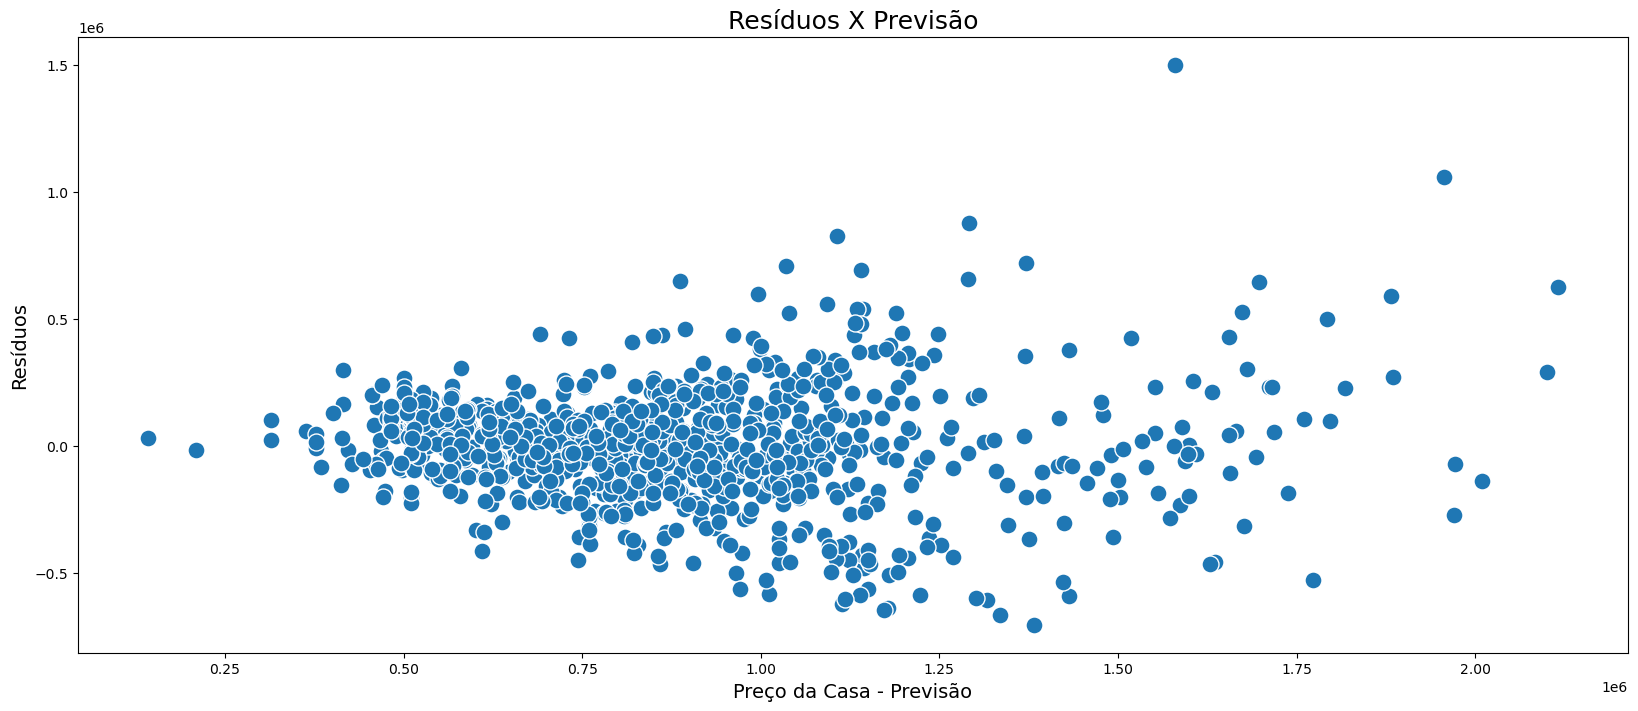

In [110]:
ax = sns.scatterplot(x=y_previsto_train, y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax
